## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo 4 - Estratégias de Treinamento e Transferência de Aprendizado</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

---

### Questão 1)

Considere as seguintes suposições que comumente são feitas ao treinar redes neurais profundas por serem consideradas importantes ou essenciais para o bom treinamento desses modelos:

I - Dados de entrada são uma mistura de numéricos e categóricos
II - Dados possuem uma taxa moderada de ruído nos rótulos
III - Conjunto de treinamento possui dados balanceados em termos de classes
IV - Dados de entrada possuem features que variam em intervalos similares
V - Há dados suficientes e representativos com relação à tarefa alvo do problema

Quais dessas são verdadeiras?

(a) I, III<br>
(b) I, III, V<br>
(c) II, III<br>
(d) III, V<br>
(e) III, IV, V<br>

---
### Questão 2)


Considere os valores de perda abaixo listadas, observadas no conjunto de treinamento de forma independente após treinar modelos de rede profunda por 50 épocas para um problema de classificação de 9 classes usando a perda entropia cruzada categórica.

I - Perda 1.5<br>
II - Perda 2.2<br>
III - Perda 9.0<br>
IV - Perda -39.0<br>

Dica: para interpretar os valores acima, realize simulações com distintas situações calculando as perdas a partir de vetores de probabilidade com: (1) todas as classes equiprováveis, (2) classe correta (alvo) com probabilidade muito baixa (0.00001) e demais equiprováveis, (3) e vetor de probabilidade com a classe alvo contendo a máxima, porém baixa, probabilidade (use o dobro da probabilidade aleatória para a classe alvo e distribua igualmente as demais).<br>

Qual a interpretação do resultado dos valores acima?

(a) I: classe alvo com probabilidade 0.1111, II: classe alvo probabilidade 0.00001 e demais equiprováveis, III: classes equiprováveis, IV:  provável erro de cálculo numérico<br>
(b) I: classe alvo com probabilidade 0.2222, II: classes equiprováveis, III: classe alvo probabilidade 0.00001 e demais equiprováveis, IV: provável erro de cálculo numérico<br>
(c) I: classes equiprováveis, II: classe alvo com probabilidade 0.51, III: classe alvo com probabilidade 0.1, IV: classe alvo probabilidade 0.00001 e demais equiprováveis<br>
(d) I: classes equiprováveis, II: classe alvo com probabilidade 0.1111, III: provável erro de cálculo numérico, IV: classe alvo probabilidade 0.2222 e demais equiprováveis<br>
(e) I: classe alvo com probabilidade 0.3333, II: classes equiprováveis, III: classe alvo com probabilidade 0.9, IV: provável erro de cálculo numérico<br>


In [ ]:
import numpy as np

def cross_entropy_loss(y,yh):
    return -np.sum((y*np.log(yh)))

classes = 9

y_ref = np.zeros(classes)
y_ref[0] = 1

---

## Questão 3)

Considere as seguintes afirmações sobre estratégias para melhorar o desempenho de redes neurais profundas:

I - Pré-treinamento em dados não relacionados à tarefa alvo sempre melhora a generalização</br>
II - Aumentar os dados pode ajudar a reduzir overfitting</br>
III - Augmentation deve ser utilizado em todos os tipos de dados, inclusive categóricos e numéricos</br>
IV - Pré-treinamento sempre deve ser feito exclusivamente com imagens em preto e branco</br>
V - Aumentar os dados é mais eficaz quando as variações geradas são realistas</br>

Quais dessas são verdadeiras?

(a) I, III</br>
(b) I, II, V</br>
(c) II, V</br>
(d) II, IV, V</br>
(e) III, IV</br>

---
### Questão 4)

Carregue a base de dados Fashion-MNIST e use uma rede neural convolucional com arquitetura contendo as seguintes camadas  (conforme código disponível no notebook fornecido)
* Camada Convolucional 2D, contendo 128 filtros 3x3 e stride 1, ativação=relu, padding=same
* MaxPooling 2D com passo e stride 2 nas duas direções
* Bloco Residual com 64 filtros nas suas camadas convolucionais
* GlobalAveragePooling2D
* Camada densa de saída softmax

Utilizar: otimizador Adam, 10 épocas. com entropia cruzada categórica.

Investigue os seguintes hiperparâmetros de otimização:
- taxa de aprendizado: 0.0005, 0.001
- batch-size: 16 e 64,

Para a taxa de aprendizado 0.005 usar decaimento exponencial de 0.005, e para a taxa de aprendizado 0.001 usar decaimento exponencial de 0.075 desde a primeira época (sem arredondar o resultado no scheduler).

Utilize as primeiras 1000 imagens (:1000) para treinamento e as próximas 400 para validação (1000:1400), conforme código disponível no notebook fornecido.

Repita o experimento 5 vezes, utilizando sementes de 1 a 5 que devem ser setadas no tensorflow e numpy antes da compilação e treinamento de cada modelo. Use o mesmo conjunto de treinamento e validação em todas as execuções e obtenha a perda média (das 5 execuções) computada no conjunto de validação e arredonada para 2 casas decimais.

Qual combinação de hiperparâmetros teve menor valor de perda média, considerando o conjunto de validação?

(a) learning rate = 0.0005, batch size = 16 <br>
(b) learning rate = 0.0005, batch size = 64 <br>
(c) learning rate = 0.001, batch size = 16 <br>
(d) learning rate = 0.001, batch size = 64 <br>
(e) todas tiveram a mesma perda média arredondada para 2 casas decimais<br>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
Classes:  10


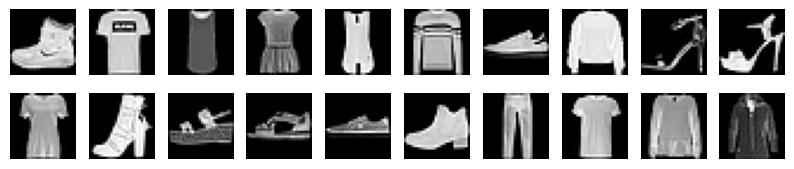

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy.random import seed
from tensorflow.random import set_seed

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis('off')

img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# verifica se as imagens da base de dados tem um canal (i.e. em tons de cinza)
# ou mais do que um canal e se houver mais do que um canal entao armazena a
# quantidade de canais
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formatando as imagens de forma que sejam transformadas em
# matrizes com canais (por exemplo quando as imagens sao RGB)
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import add

def residual_block(layer_in, n_filters):
    merge_input = layer_in
    #verifica se é necessária uma primeira camada para deixar o número de filtros iguais para adição
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv1
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv2
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
    # soma entrada com saída (pulou 2 camadas)
    layer_out = add([conv2, merge_input])
    # função de ativação da saída do bloco
    layer_out = keras.layers.Activation('relu')(layer_out)
    return layer_out

# minha ResNet
def ResNetModel():
    input_layer = Input(shape=input_shape)
    ### completar
    ResNetModel = keras.models.Model(inputs=input_layer, outputs= ...)
    return ResNetModel

In [ ]:
def scheduler_exemplo(epoch, lr):
    return float(lr * tf.math.exp(-0.005))

In [ ]:
epochs = 10

lrs = [0.0005, 0.001]
bss = [16, 64]

for lr in lrs:
    for bs in bss:
        print(f'LR: {lr}, BS: {bs}')
        for sd in range(1,6):
            seed(sd)
            set_seed(sd)
            model = ResNetModel()
            ### completar

---

### Questão 5)

Realize um procedimento de extração de características de imagens conforme os seguintes passos, parte dos quais já está disponivel no notebook fornecido:
1. Carregue e processe a base de dados "eurosat" do tensorflow-datasets conforme código disponível.
2. Carregue um modelo Xception pré-treinado na ImageNet sem utilizar o topo da rede. Crie um modelo extrator de características incluindo a Xception carregada seguida de uma camada de Global Max Pooling para realizar extração das 2048 características da base de dados.
3. Obtenha um array com as características extraídas a partir do modelo extrator criado no passo anterior
4. Utilizando as características obtidas referentes ao conjunto de treinamento, ajuste um modelo PCA com 120 componentes. Utilize o atributo `explained_variance_ratio_` e compute a porcentagem da variância retida nesses 120 componentes (somadas).

Em qual intervalo recai a soma da porcentagem da variância retida nas 120 componentes principais?

(a) 1 a 20%<br>
(b) 21 a 40%<br>
(c) 41 a 60%<br>
(d) 61 a 80%<br>
(e) 81 a 100%<br>

In [ ]:
### Passo 1 - carregar e preparar dados
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

import tensorflow_datasets as tfds

download_url = "https://huggingface.co/datasets/torchgeo/eurosat/resolve/c4629ffcef452ee1dd8025fb71c57a0dfb4ba61c/EuroSAT.zip"
builder = tfds.builder('eurosat')
builder.builder_config.download_url = download_url
builder.download_and_prepare()

train_ds = tfds.load('eurosat', split='train[0%:15%]', as_supervised=True)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# redimensionando exemplos e normalizando entre 0-1 tipo float32
img_size = (100, 100)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

input_shape = img_size+(3,)

batch_size = 64
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(train_ds.take(15)):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image[i])
    plt.title(str(label[i].numpy()))
    plt.axis("off")